# 4章 ニューラルネットワークの学習

## 損失関数
### 二乗和誤差

In [ ]:
import numpy as np

# t: 教師データ
# index 2を正解とする
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]

# y: ニューラルネットワークの出力
# 例1.「2」の確率が最も高い場合(0.6)
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]

# 二乗和誤差
def mean_squared_error(y, t):
    return 0.5 * np.sum((y - t) ** 2)

# np.arrayはsumに渡すために変換をしている
mean_squared_error(np.array(y), np.array(t))
# => 0.0975000...31

# 例2.「7」の確率が最も高い場合(0.6)
y = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]
mean_squared_error(np.array(y), np.array(t))
# => 0.59750...3

# 2つの結果でわかることは、教師データとの誤差を表している
# 例1の結果のほうが値が小さいので誤差が小さいことがわかる。


### 交差エントロピー誤差

In [ ]:
def cross_entropy_error(y, t):
    delta = 1e-7
    return -np.sum(t * np.log(y + delta))

t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
a = cross_entropy_error(np.array(y), np.array(t))
print(a)
# => 0.510825457099

y = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]
b = cross_entropy_error(np.array(y), np.array(t))
print(b)
# => 2.30258409299


# こちらも1番目の結果の方が値が小さいので誤差が小さいと判断する

In [ ]:
np.random.choice(60000, 10)

In [3]:
import numpy as np
import sys, os
sys.path.append(os.getcwd() + '/oreilly')
from dataset.mnist import load_mnist

# y : ニューラルネットワーク出力
# t : 教師データ
def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, t.size)
        
    batch_size = y.shape[0]
    # バッチ枚数で正規化し、1枚あたりの平均の交差エントロピー誤差を計算する
    return -np.sum(t * np.log(y + delta)) / batch_size

# load_mnist内の関数（_change_one_hot_label）の定義側にtypoがあった
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

train_size = x_train.shape[0]
batch_size = 10
batch_mask = np.random.choice(train_size, batch_size)
print('batch_mask : %s', batch_mask)
x_batch = x_train[batch_mask]
t_batch = t_train[batch_mask]

print('x_batch : %s', x_batch)
print('t_batch : %s', t_batch)


batch_mask : %s [42816 57611 34675 34649   433 54125 10495 59537 51602 46801]
x_batch : %s [[ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]]
t_batch : %s [[ 0.  0.  0.  0.  1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  1.  0.]
 [ 0.  0.  1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  1.  0.]
 [ 0.  0.  0.  1.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  1.]
 [ 0.  0.  1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  1.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]]


# 数値微分の例


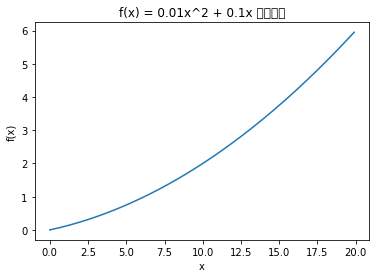

In [7]:
# y = 0.01x^2 + 0.1x

# ↑を関数にしたもの
def f_1(x):
    return (0.01 * x ** 2) + (0.1 * x)

import numpy as np
import matplotlib.pylab as plt

x = np.arange(0.0, 20.0, 0.1)
y = f_1(x)

plt.title("f(x) = 0.01x^2 + 0.1x ")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.plot(x, y)
plt.show()

In [20]:
# f_1関数の微分をx=5, x=10の時にそれぞれで計算する

# 数値微分 中心差分
def numerical_diff(f, x):
    h = 1e-4 # 0.0001
    print("numerical_diff x : ", x)
    return (f(x + h) - f(x - h)) / (2 * h)

a = numerical_diff(f_1, 5)
print(a)
b = numerical_diff(f_1, 10)
print(b)

numerical_diff x :  5
0.1999999999990898
numerical_diff x :  10
0.2999999999986347


# 偏微分

$$ f(x_0, x_1) = x^2_0 + x^2_1 $$

In [21]:
# ↑を実装するこうなる
def f_2(x):
    return x[0] ** 2 + x[1] ** 2

# x0 = 3, x1 = 4のときのx0に対する偏微分を求める
def function_tmp1(x0):
    tmp = x0*x0 + 4.0 ** 2.0
    print("tmp1 : %s", tmp)
    return tmp

numerical_diff(function_tmp1, 3.0)


numerical_diff x :  3.0
tmp1 : %s 25.00060001
tmp1 : %s 24.99940001


6.00000000000378